# Process Capability Analysis for NonLinear Profiles Using Depth Functions


## Autores: Ruben Dario Guevara; Jose Alberto Vargas


Para la implementación de esta propuesta en R, se realizará en 3 secciones las cuales son:


    1. Descripción de las propuestas para determinar las   estadísticas de orden en datos funcionales.
    2. Replica de la simulación presentada en el artículo.
    3. Réplica del ejercicio partico.
    
En cada una de las secciones se usara un conjunto de datos diferentes. Con el motivo de implementar las propuestas que aqui se presentan, se usaran las siguientes librerias:   

In [1]:
# Librerias 
library(fda) ## Libreria util para el manejo de datos funcionales
library(ddalpha) ## Libreria que contiene la informacion a trabajar en la primera seccion
library(fdaoutlier) ## Libreria que contienen diferentes propuestas para determinar medidas de profundidad
library(dplyr)


Loading required package: splines
Loading required package: Matrix
Loading required package: fds
Warning message:
"package 'fds' was built under R version 3.6.3"Loading required package: rainbow
Warning message:
"package 'rainbow' was built under R version 3.6.3"Loading required package: MASS
Loading required package: pcaPP
Warning message:
"package 'pcaPP' was built under R version 3.6.3"Loading required package: RCurl
Warning message:
"package 'RCurl' was built under R version 3.6.3"Loading required package: deSolve
Warning message:
"package 'deSolve' was built under R version 3.6.3"
Attaching package: 'fda'

The following object is masked from 'package:graphics':

    matplot

Warning message:
"package 'ddalpha' was built under R version 3.6.3"Loading required package: class
Loading required package: robustbase
Warning message:
"package 'robustbase' was built under R version 3.6.3"Loading required package: sfsmisc
Loading required package: geometry
Warning message:
"package 'geometr

## 1. Propuestas de estadisticas de orden para datos funcionales.



En el desarrollo de esta seccion se realizara con el conjunto de datos de tecator, la cual consiste en la medicion de curvas espetrometicas asociadas a unos cortes de carne. A continuacion se realizara la manipulacion de esta informacion,incluyendo la grafica de las observaciones que se tienen:

In [2]:
### llamado de la informaciòn
df <- dataf.tecator()


## Arreglar el df
df<-as.data.frame(df$dataf)

## Valores en los cuales estan medidas las observaciones
args<-paste0('med_1',round(df$args))
val_args<-df$args



# Organizar infor
df<-df %>% select(!starts_with("args"))

df<-t(df) %>% as.data.frame()
colnames(df)<-args
rownames(df)<-rep(1:nrow(df))
head(df)

med_1850,med_1852,med_1854,med_1856,med_1858,med_1860,med_1862,med_1864,med_1866,med_1868,...,med_11032,med_11034,med_11036,med_11038,med_11040,med_11042,med_11044,med_11046,med_11048,med_11050
2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920
2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942
2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753
3.00993,3.01540,3.02086,3.02634,3.03190,3.03756,3.04341,3.04955,3.05599,3.06274,...,3.57163,3.55877,3.54651,3.53442,3.52221,3.50972,3.49682,3.48325,3.46870,3.45307


con esto, se procede a realizar la implementacion de cada una de las propuestas para calcular las estadisticas de orden que se presentan en el articulo.

### 1.1  Profundidad basada en bandas


 Sea $y_1(t),...,y_m(t)$, una colección  de observaciones dentro de $C(I)$, con $C(I)$ un conjunto de funciones continuas definidas sobre un conjunto compacto sobre el intervalo $I$ en $\mathcal{R}$. La grafica de la función y es un conjunto de $\mathcal{R}^2$ dado por $G(y)={(t,y(t)):t\in I}$. La banda  en $\mathcal{R}^2$ delimitada por las curvas $y_{i1},...,y_{ik}$ es:
    
    
$$    
B(y_{i1},...,y_{ik})=\left\{(t,y): t\in I, {min} (y_{ir}(t))\leq y\leq {max}   ( y_{ir}(t) )\right\}
 $$
 
Ahora sea  J un valor fijo donde  $2\leq J \leq m$. Para las funciones $y_1,...,y_m$,la profundidad basada en bandas  para cualquier curva es :

$$
BD_{m,J}(y)=\sum_{j=2}^J BD_m^{(j)}(Y)
$$

donde J es un parametro exogeno que indica el número máximo de curvas a usar para construir una banda. Los autores proponen tomar J=3, ademas se define $BD_m^{(j)}(Y)$ como:

$$
BD_m^{(j)}(Y)=
   {m \choose j}^{-1} \sum_{1< i_1 < i_2 <\cdots <i_j<m} I\{G(y)\subseteq B(y_{i1},y_{i2},\cdots,y_{ik})\}
$$

con $I\{*\}$ la funcion indicadora.

Para ilustrar mejor esta idea, observemos lo siguiente:

Primero tomemos 4 observaciones de nuestro conjunto de prueba:

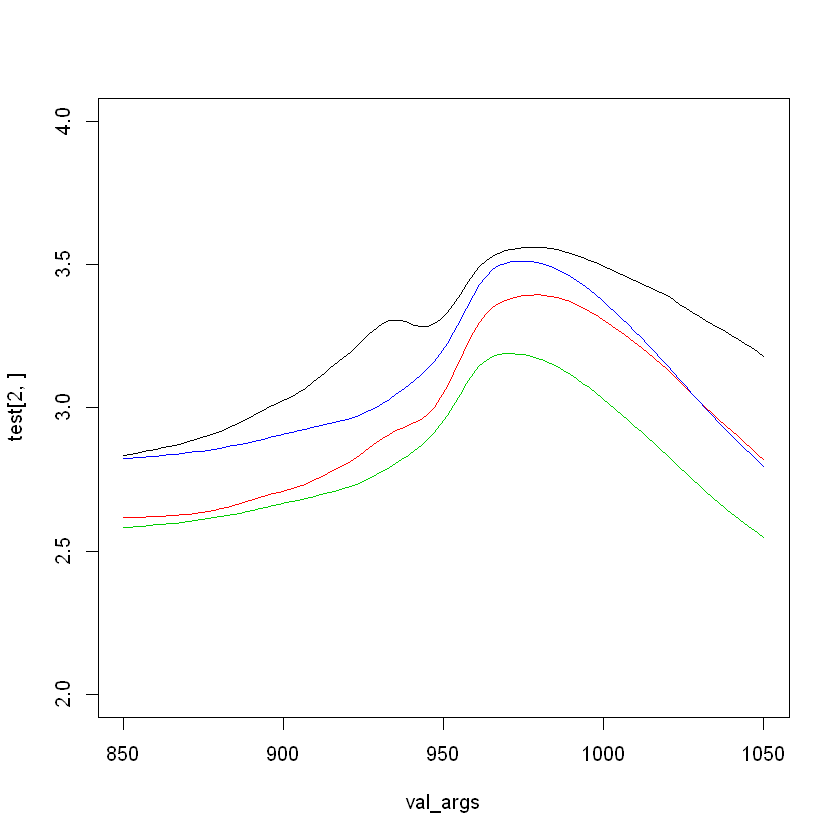

In [3]:
test<-df[1:4,]


plot(val_args,test[2,],type='l',ylim=c(2,4))
lines(val_args,test[1,],col=2)
lines(val_args,test[3,],col=3)
lines(val_args,test[4,],col=4)


 Como se puede observa en la anterior grafica, se puede tener 6 combinaciones de parejas de curvas, las cuales se puede ver que al emplear la formula las observaciones de color azul y rojo estan 5 veces entre todas las posibles combinaciones y las restantes 3. Dicha medida se puede calcular con el siguiente comando:

In [4]:
## Libreria fda

fbplot(t(test),plot=F,method="BD2")

#Libreria fdoutlies
band_depth(test)

$depth
        1         2         3         4 
0.6666667 0.5000000 0.5000000 0.6666667 

$outpoint
[1] 2 3

$medcurve
1 4 
1 4

[1] 0.6666667 0.5000000 0.5000000 0.6666667

### 1.2 Profundidad modificada basada en bandas

Devido a que la anterior definicion es muy restrictiva respecto a que una curva este dentro de la respectiva banda,Los autores   **López-Pintado and Romo** introducen una definición mas flexible, la cual consiste en una medida de las veces que una curva $Y(t)$ esta sobre la banda definida, Esta propuesta esta dado por:
    
  $$
    MBD_m^{j}(y)= {m\choose j}^{-1}\sum_{1\leq i_1 < i_2 <...<ij<m} \lambda_r(A(y_{i1},y_{i2},...,y_{ij})),2\leq j \leq m
$$
    
   Donde: 
   $A_j(y;y_{i1},y_{i2},...,y_{ij}):=
 \left\{(t,y):t\in I, {min} (y_{ir}(t))\leq y\leq {max}   ( y_{ir}(t) )\right\}$
 
$$
 \lambda_r(y)=\frac{\lambda(A_j(y))}{\lambda(I)}
 $$
 
  Con $\lambda$ la medida de lebesgue  sobre I.
  
La implementacion de esta medida se presentara a continuacion:


Suponga que se tienen las anteriores observaciones.

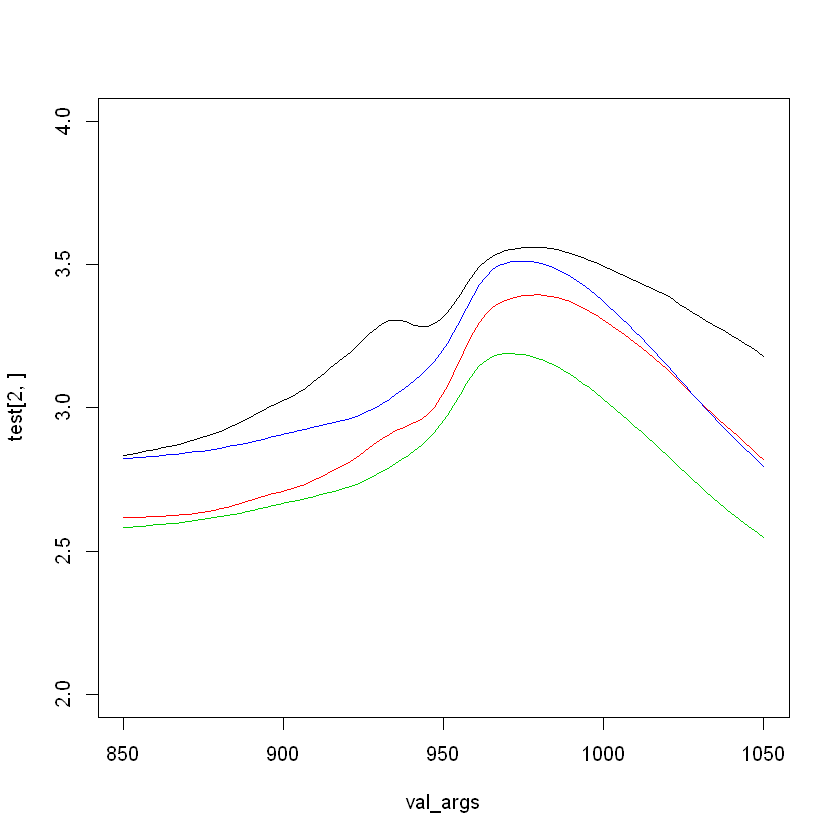

In [5]:
plot(val_args,test[2,],type='l',ylim=c(2,4))
lines(val_args,test[1,],col=2)
lines(val_args,test[3,],col=3)
lines(val_args,test[4,],col=4)

Algo similar sucede que en el caso anterior. A continuacion se presenta el codigo que calcula esta metrica.

In [6]:
# Libreria fda

fbplot(t(test),plot=F,method="MBD")$depth

#Libreria fdoutlies
modified_band_depth(test)

1         2         3         4 
0.8333333 0.5000000 0.5000000 0.8333333

[1] 0.8333333 0.5000000 0.5000000 0.8333333

### 1.3 Region Central


 Sea $y_1,...,y_m$ una muestra de funciones continuas en $C(I)$. Sea $y_{(1)}...,y_{(m)}$ las correspondientes curvas ordenadas a partir de como va decreciendo la medida de profundidad. . Con esto se estima la $\alpha$-recordad región  $R_\alpha$ como la banda delimitada por la muestra de curvas con profundidad mas grande o igual a $\alpha$ como:
 
$$\hat{R}_{m,\alpha}=\left\{(t,y): t\in \mathbf{I} \times \mathbb{R},min \{y_{(i)}(t)\}\leq y\leq max  \{y_{(i)}(t)\} \right\}$$

**López-Pintado and Romo** definen la p-región central, $C_{m,p}$ , como la banda que esta definida por la fración de las p curvas mas profundas como sigue:

$$
C_{m,p}=B(y_{(1)}...,y_{(m)})
$$

a continuacion se ilustra lo mensionado:

Trabajando con la base de tecator, suponga que se quiere determinar la region central p=50% utilizando como base la profundidad basado en bandas, esto implica que dicha region esta compuesta por el 50% de curvas con mayor profundidad. A continuacion se realizara una ilustracion de este concepto:


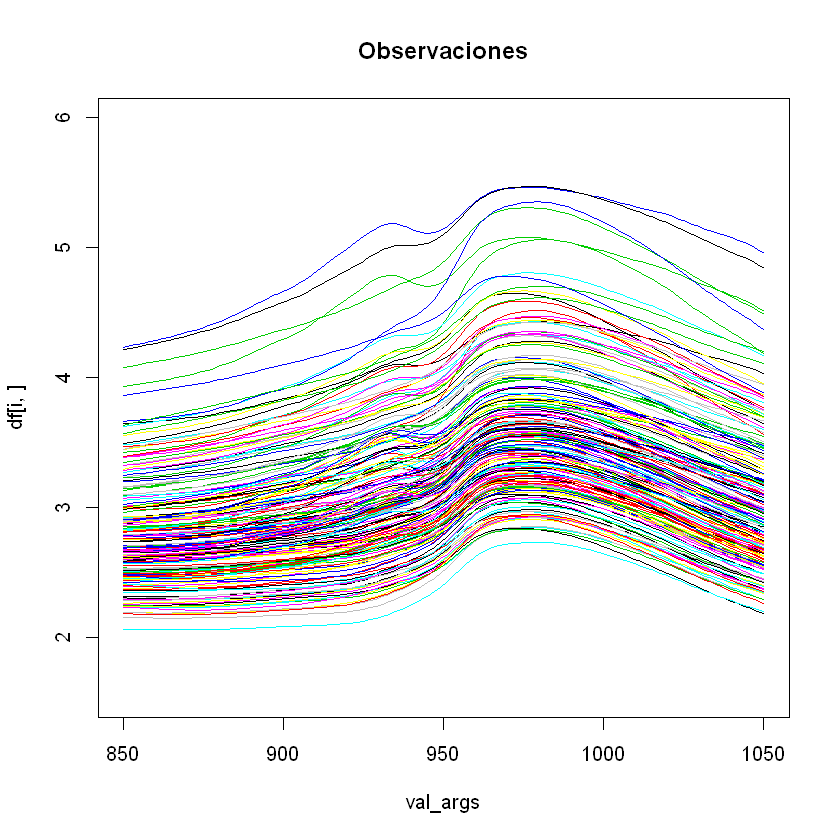

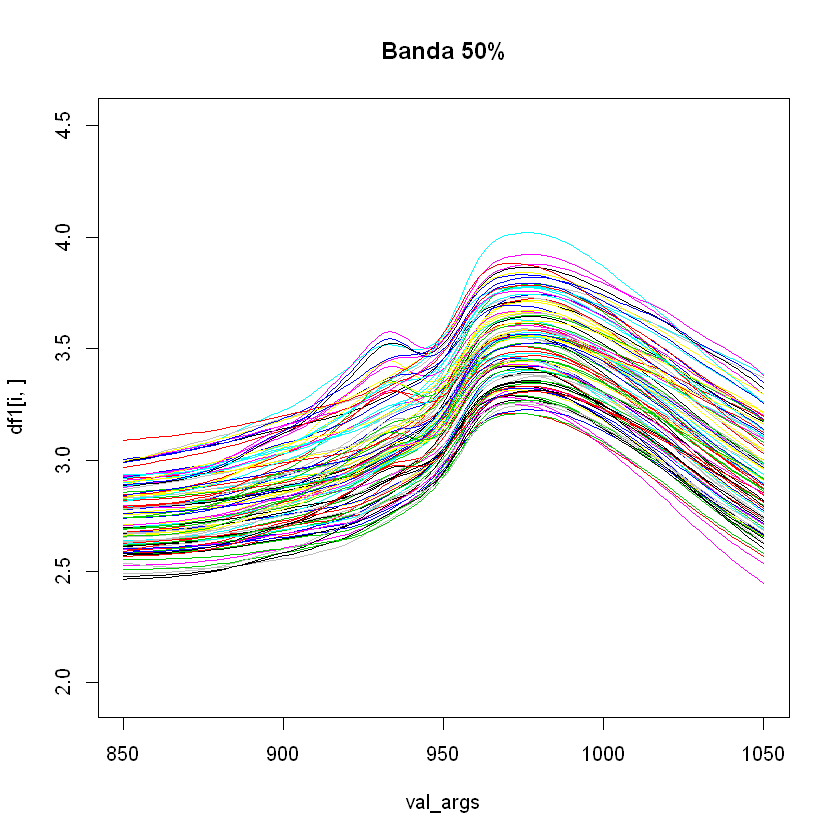

In [7]:
#Grafica de todas las observaciones

for(i in 1:nrow(df)){
    if(i==1){
       plot(val_args,df[i,],type='l',ylim=c(min(df)-0.5,max(df)+0.5)
           ,main='Observaciones')
    }
    else{
        lines(val_args,df[i,],col=i)
    }
}

# Determinar la profundidad para estas observaciones

depth<-fbplot(t(df),plot=F,method="MBD")$depth

depth<-cbind(depth_l=depth,ind=seq(1,nrow(df)))%>% as.data.frame()

# region  central al 50 %
depth<-depth %>% subset(depth_l>=quantile(depth$depth_l,prob=0.5))


df1<-df[depth$ind,]

for(i in 1:nrow(df1)){
    if(i==1){
       plot(val_args,df1[i,],type='l',ylim=c(min(df1)-0.5,max(df1)+0.5)
           ,main='Banda 50%')
    }
    else{
        lines(val_args,df1[i,],col=i)
    }
}

# 1.4 Estadisticas de Orden

# 1.4.1 Cuantiles y mediana 
 
A partir de la región  central. los bordes asociados de la region central p y los cuantiles q es cuando q y p satisfacen la siguiente relacion p=|2q-1|. A demas la curva mas profunda es aquella que posee la mayor profundidad. A continuacion se mostrara graficamentemente a partir de la region p=50% , los cuantiles asociados q=25,q=75 y la mediana.

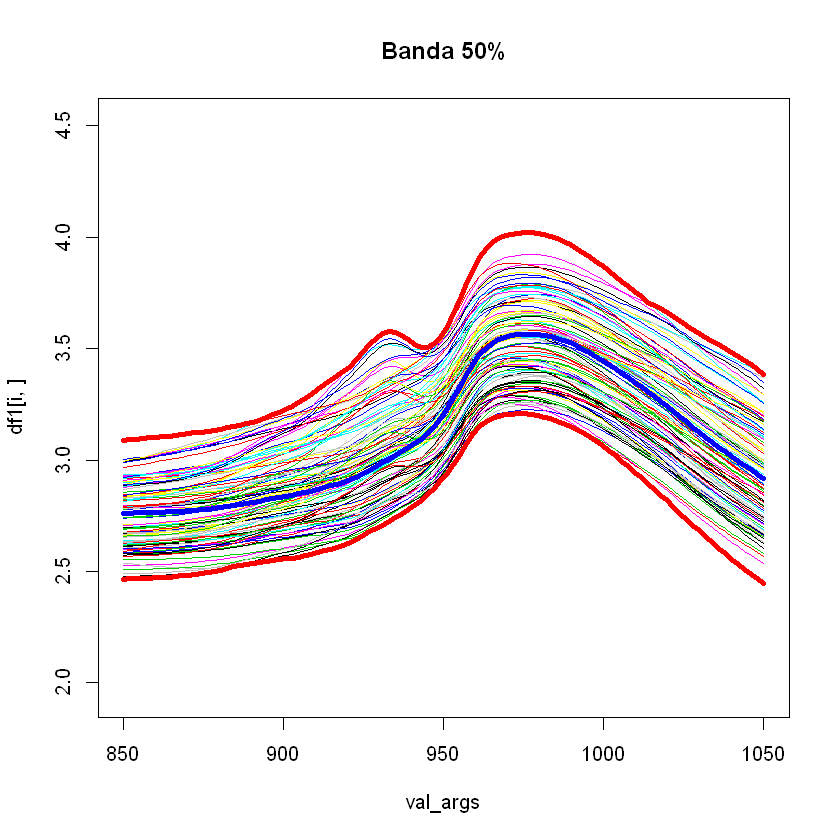

In [8]:
for(i in 1:nrow(df1)){
    if(i==1){
       plot(val_args,df1[i,],type='l',ylim=c(min(df1)-0.5,max(df1)+0.5)
            ,main='Banda 50%')
    }
    else{
        lines(val_args,df1[i,],col=i)
    }
}

### Grafico de los cuantiles. 

lines(val_args,apply(df1,2,max),lwd=4,col=2)
lines(val_args,apply(df1,2,min),lwd=4,col=2)
lines(val_args,df[fbplot(t(df),plot=F,method="MBD")$medcurve,],lwd=4,col=4)




## 1.4.2 Media Recortada

 La version funcional  de la media $\alpha$-recortada, es un estimador robusto del centro de la distribución y dicha estadistica se define de la siguiente forma:
 
 $$
 \mu_{TM_\alpha}=\frac{1}{m-[ \alpha m ]}\sum_{i=1}^{m-[ \alpha m ]}y_{(i)}
 $$
 
 Donde $[.]$ indica la función parte entera y  $0\leq \alpha\leq \frac{m-1}{m}$. Cuando $\alpha$=0, la media recortada  es la media funcional, y si $\alpha=\frac{m-1}{m}$  es la mediana funcional; devido a que para calcular esta medida, depende de la metrica de profundidad a usar, $\alpha$ juega el papel del porcentaje de curvas mas profundas a utilizar. A continuacion se presenta el codigo para calcular esta medida utilizando el 50% de curvas mas profundas:
                                   

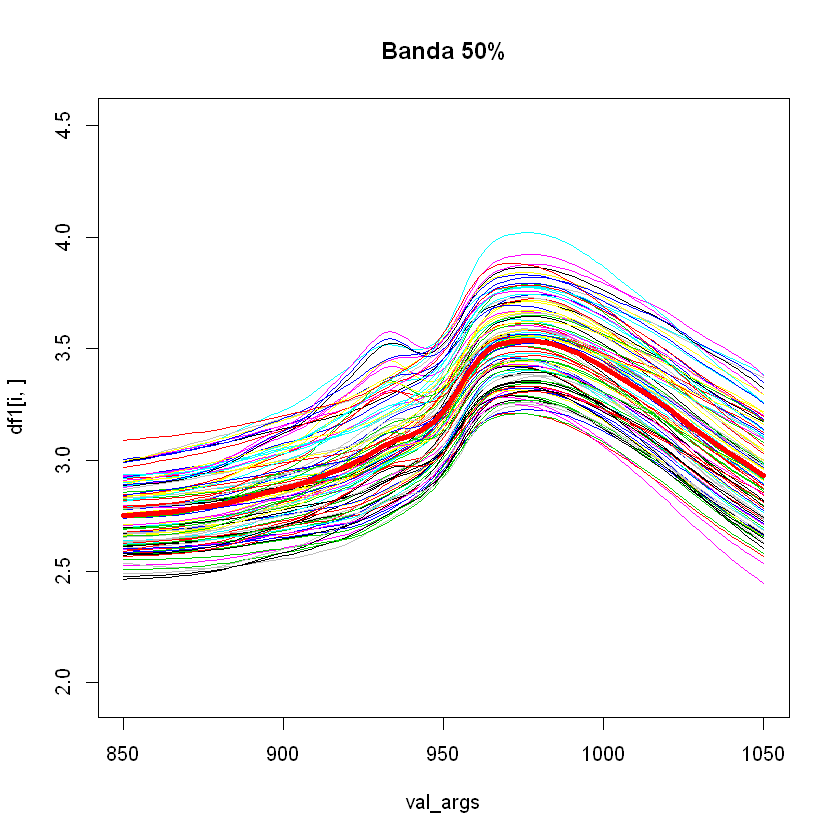

In [9]:
### recordar que el df1 contiene el 50 % de las curvas mas profundas

for(i in 1:nrow(df1)){
    if(i==1){
       plot(val_args,df1[i,],type='l',ylim=c(min(df1)-0.5,max(df1)+0.5)
            ,main='Banda 50%')
    }
    else{
        lines(val_args,df1[i,],col=i)
    }
}

### Grafico de los cuantiles. 

lines(val_args,apply(df1,2,mean),lwd=4,col=2)





### 1.5 Profundidad basada en bandas por secciones

La idea esencial de este apartado es calcular la medida de profundidad sobre secciones de cada curva, determinar los respectivos estadisticas de orden sobre cada segmento y despues unir cada uno de los resultados. A continuacion se  mostrara el codigo para ejecutar esta propuesta, dividiendo la curva en 3 partes iguales.

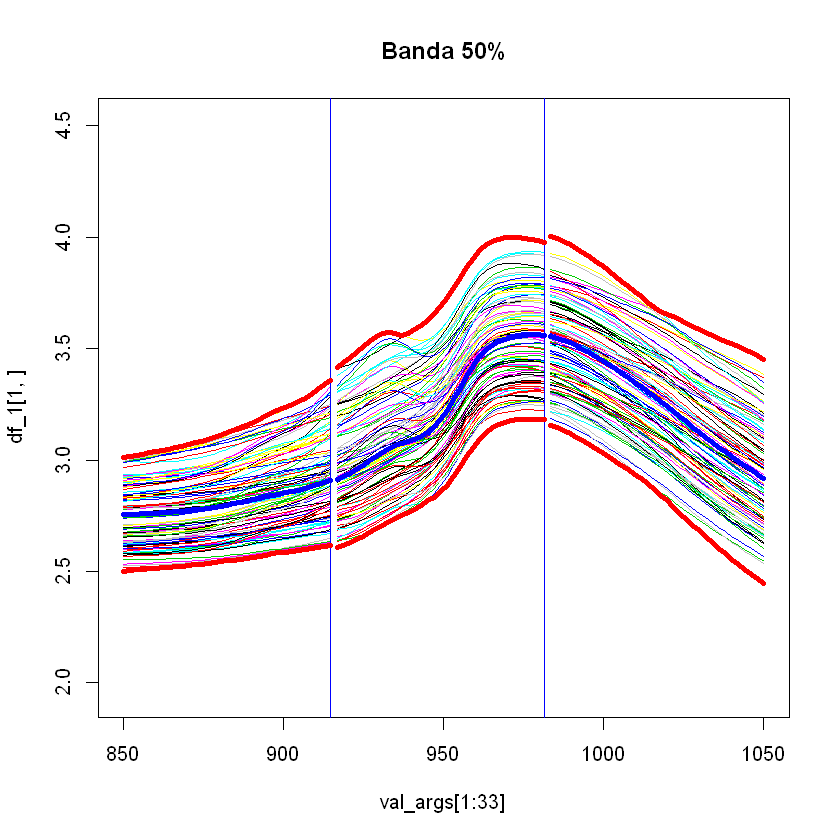

In [10]:
### Seleccion de segmentos

df_1<-df[,1:33]
df_2<-df[,34:66]
df_3<-df[,67:100]

### 
depth_1<-fbplot(t(df_1),plot=F,method="MBD")$depth
depth_2<-fbplot(t(df_2),plot=F,method="MBD")$depth
depth_3<-fbplot(t(df_3),plot=F,method="MBD")$depth

##

depth_1<-cbind(depth_l=depth_1,ind=seq(1,nrow(df_1)))%>% as.data.frame()
depth_2<-cbind(depth_l=depth_2,ind=seq(1,nrow(df_2)))%>% as.data.frame()
depth_3<-cbind(depth_l=depth_3,ind=seq(1,nrow(df_3)))%>% as.data.frame()


# region  central al 50 %
depth_1<-depth_1 %>% subset(depth_l>=quantile(depth_1$depth_l,prob=0.5))
depth_2<-depth_2 %>% subset(depth_l>=quantile(depth_2$depth_l,prob=0.5))
depth_3<-depth_3 %>% subset(depth_l>=quantile(depth_3$depth_l,prob=0.5))


df_1<-df_1[depth_1$ind,]
df_2<-df_2[depth_3$ind,]
df_3<-df_3[depth_2$ind,]

for(i in 1:nrow(df_1)){
    if(i==1){
       plot(val_args[1:33],df_1[1,],type='l',ylim=c(min(df1)-0.5,max(df1)+0.5),xlim=c(min(val_args),max(val_args))
           ,main='Banda 50%')
    }
    else{
        lines(val_args[1:33],df_1[i,],col=i)
    }
}

for(i in 1:nrow(df_1)){
        lines(val_args[34:66],df_2[i,],col=i)
}

for(i in 1:nrow(df_1)){ 
        lines(val_args[67:100],df_3[i,],col=i)
}

abline(v=val_args[33], col="blue")
abline(v=val_args[66], col="blue")

lines(val_args[1:33],apply(df_1,2,max),lwd=4,col=2)
lines(val_args[1:33],apply(df_1,2,min),lwd=4,col=2)
lines(val_args[1:33],df_1[fbplot(t(df_1),plot=F,method="MBD")$medcurve,],lwd=4,col=4)

lines(val_args[34:66],apply(df_2,2,max),lwd=4,col=2)
lines(val_args[34:66],apply(df_2,2,min),lwd=4,col=2)
lines(val_args[34:66],df_2[fbplot(t(df_2),plot=F,method="MBD")$medcurve,],lwd=4,col=4)

lines(val_args[67:100],apply(df_3,2,max),lwd=4,col=2)
lines(val_args[67:100],apply(df_3,2,min),lwd=4,col=2)
lines(val_args[67:100],df_3[fbplot(t(df_3),plot=F,method="MBD")$medcurve,],lwd=4,col=4)


# 1.6 Medidas  de orden punto a punto


Para este apartado, la idea de construir las estadisticas de orden, es calcular los cuantiles de interes sobre cada punto de observacion presente en el conjunto de curvas a trabajar.la curva obtenida a partir de las medidas calculadas sobre cada punto corresponde la estadistica de orden asociada al conjunto de curvas, a continuacion se presenta el codigo para determinar esta medida calculando la mediana, y los cuantiles 75 y 25:

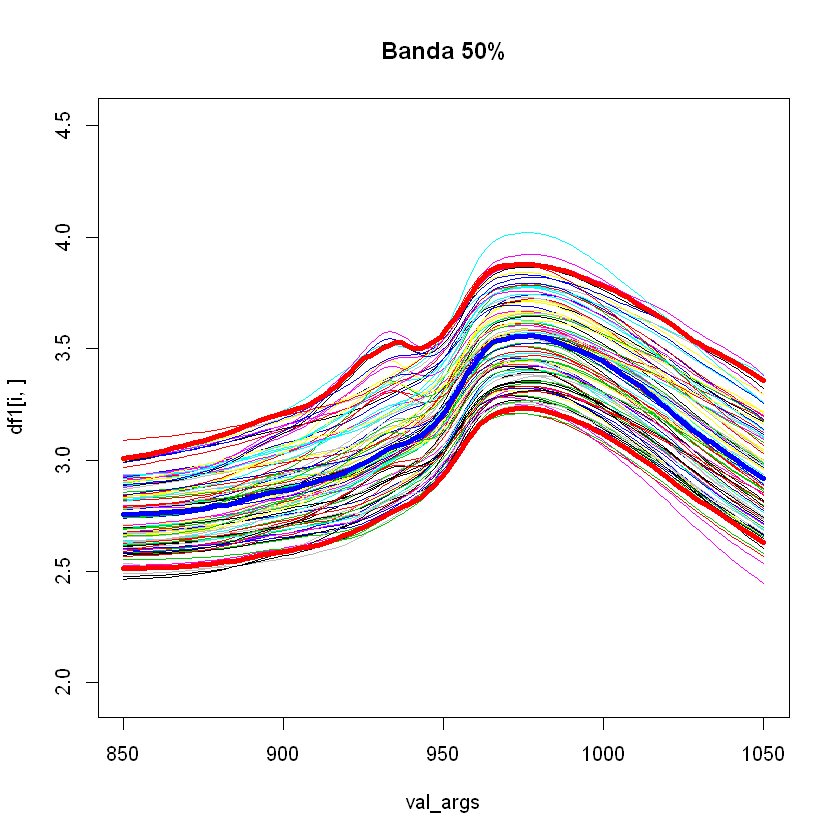

In [11]:
for(i in 1:nrow(df1)){
    if(i==1){
       plot(val_args,df1[i,],type='l',ylim=c(min(df1)-0.5,max(df1)+0.5)
            ,main='Banda 50%')
    }
    else{
        lines(val_args,df1[i,],col=i)
    }
}


lines(val_args,apply(df,2,quantile,probs=c(0.25,0.5,0.75))[1,],lwd=4,col=2)
lines(val_args,apply(df,2,quantile,probs=c(0.25,0.5,0.75))[3,],lwd=4,col=2)
lines(val_args,apply(df,2,quantile,probs=c(0.25,0.5,0.75))[2,],lwd=4,col=4)

## 2. Simulación.

Una serie de simulaciones son hechas con un número considerable de perfiles y distribuciones.  Se consideran m perfiles, con $m=20,30,60$ y $90$, con distribuciones $N(0,0.1)$,$Lognormal(0,0.3)$, $Weibull(6,1)$, $Gamma(1.2,5)$ y $Beta(5,5)$ para los términos del error $e_{ij}$. En esta simulación, se consideraran los índices $C_{pu(prf)}$, $C_{pl(prf)}$ iguales con valores de $0.77,1,1.33,1.66,2$. Para cada valor de los PCI, la especificación de las funciones (USL o LSL) son obtenidas solucionando las siguientes ecuaciones:

$$
USL(t)= C_{pu}[Y_{0.99865}(t)-Y_{0.5}(t)]+Y_{0.5}(t)\\
LSL(t)=Y_{0.5}(t)-C_{pl}[Y_{0.5}(t)-Y_{0.99865}(t)]
$$

Donde $Y_p$ es el cuantil de las distribuciones consideradas.

Asumiendo que el proceso está en control estadístico, para cada una de la simulación de los m perfiles con s puntos, tomando $s=100$, son generadas a partir de un modelo logístico de cuatro parámetros, empleados en la industria farmacéutica, donde representa un perfil de dosis -respuesta de una droga. Este modelo se presenta a continuación.

$$
y_{it}=\beta_1+\frac{\beta_2-\beta_1}{1+(t/\beta_3)^{\beta_4}}+e_{it}
$$

donde $y_{it}$ es la medida de respuesta del sujeto i expuesto al momento t, para $i=1,...,m$. Los valores de dosis respuesta que se seleccionaron para realizar este ejercicio son $\beta_1=1,\beta_2=0,\beta_3=0.6$ y $\beta_4=8$ y las funciones son definidas en el intervalo $[0,1]$.

En el artículo, se presentan los resultados de todas las combinaciones de los parámetros anteriormente descritos, pero en la implementación a realizara solo con una combinación de parámetros. 

En primera instancia se cargaran las funciones necesarias para hacer la implementación de esta sección.

In [15]:
##### Simulacion de las muestras aleatorias segun la distribucion seleccionadas

error<-function(dist,R){
  if(dist=='normal'){
    sample<-rnorm(R,mean = 0,sd=0.1)
  }
  if(dist=="lognormal"){
    sample<-rlnorm(R,0,0.3)
  }
  if(dist=="weibull"){
    sample<-rweibull(R,6,1)
  }
  if(dist=="gamma"){
    sample<-rgamma(R,1.2,5)
  }
  if(dist=="beta"){
    sample<-rbeta(R,5,5)
  }
  return(sample)
}

## simulacion de observaciones

observaciones<-function(R,m,b1,b2,b3,b4,dist,args){
  
  df<-matrix(0,ncol = R,nrow = m)
  
  for (i in 1:m) {
    df[i,]<-(b1+((b2-b1)/(1+(args/b3)^b4)))+error(dist,R)
  }
  return(df)
}


## Integral bajo la regla de trapecio compuesta

trapesio<-function(y,x){
  y[2:(length(x)-1)]<-y[2:(length(x)-1)]
  A<-(max(x)-min(x))/(length(x)-1)*(sum(y))
  A
}

### Ajustes de las funciones por smooting splines.

ajuste<-function(args,df){
if(is.vector(df)){
  basis<-create.bspline.basis(c(min(args),max(args)),10,norder = 4)
  lambda<-fdPar(basis,2,lambda = 0)
  curvas<-smooth.basis(argvals = args
                       ,y=df
                       ,fdParobj = lambda)
  
  return(curvas)
}else{
  basis<-create.bspline.basis(c(min(args),max(args)),10,norder = 4)
  lambda<-fdPar(basis,2,lambda = 0)
  curvas<-smooth.basis(argvals = args
                       ,y=t(df)
                       ,fdParobj = lambda)
  
  return(curvas)
}
}

###  band-depth  p<-region central p=0.99763

BD<-function(df,p=1){
depth<-fbplot(t(df),plot=F,method="BD2")
# curva mediana
mediana<-df[depth$medcurve,]
## Cuantiles
depth<-cbind(depth_l=depth$depth,ind=seq(1,nrow(df)))%>% as.data.frame()
# region  central al 50 %
depth<-depth %>% subset(depth_l<=quantile(depth$depth_l,prob=p))
## Cuantiles
df1<-df[depth$ind,]
q_inf<-apply(df1,2,min)
q_max<-apply(df1,2,max)
resultados<-list(mediana=mediana,q_max=q_max,q_min=q_inf)
return(resultados)
}

### MODIFIED BAND DEPTH

MBD<-function(df,p=1){
  
  depth<-fbplot(t(df),plot=F,method="MBD")
  # curva mediana
  mediana<-df[depth$medcurve,]
  ## Cuantiles
  depth<-cbind(depth_l=depth$depth,ind=seq(1,nrow(df)))%>% as.data.frame()
  # region  central al 50 %
  depth<-depth %>% subset(depth_l<=quantile(depth$depth_l,prob=p))
  ## Cuantiles
  df1<-df[depth$ind,]
  q_inf<-apply(df1,2,min)
  q_max<-apply(df1,2,max)
  resultados<-list(mediana=mediana,q_max=q_max,q_min=q_inf)
  return(resultados)
}

####  POINT WISE 

pointwise<-function(df,q_max,q_min){
  mediana<-apply(df,2,quantile,0.5)
  q_max<-apply(df,2,quantile,q_max)
  q_min<-apply(df,2,quantile,q_min) 
  resultados<-list(mediana=mediana,q_max=q_max,q_min=q_min)
  return(resultados )
}

##### trimmed mean p_a media recortada
 
media_recortada<-function(df,p,p_a){
depth<-fbplot(t(df),plot=F,method="MBD")
## Cuantiles
depth<-cbind(depth_l=depth$depth,ind=seq(1,nrow(df)))%>% as.data.frame()
# region  central al 50 %
depth_trim<-depth %>% subset(depth_l<=quantile(depth$depth_l,prob=p))
depth<-depth %>% subset(depth_l<=quantile(depth$depth_l,prob=p_a))
## Cuantiles
df1<-df[depth$ind,]
df2<-df[depth_trim$ind,]
### media recortada
media_recortada<-apply(df2,2,mean)
q_inf<-apply(df1,2,min)
q_max<-apply(df1,2,max)
resultados<-list(mediana=mediana,q_max=q_max,q_min=q_inf)
return(resultados)
}

Ahora se define los parámetros para realizar la simulación.

In [16]:
###  parametros  iniciales ######
### tamaño de muestra
m<-90
### distribucion soportadas "normal","lognormal","weibull","gamma","beta"
dist<-"normal"
## PCI
pci<-2
## parametros dosis modelo de dosis respuesta
b1<-1
b2<-0
b3<-0.6
b4<-8
# puntos a simular
R=100
## simulacion de observaciones
args<-seq(0,1,by=1/(R-1))

Con estas condiciones, se procede a simular cada una de las observaciones funcionales. A continuación se presenta la gráfica de lo obtenido:

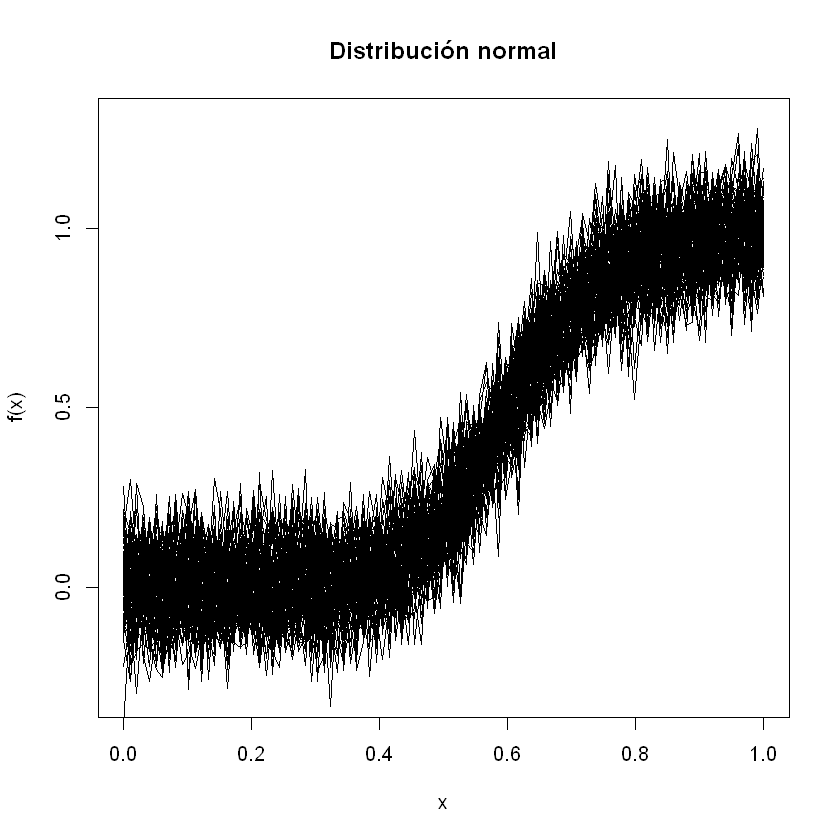

In [19]:
df<-observaciones(R,m,b1,b2,b3,b4,dist,args)

for ( i  in 1:nrow(df)) {
  if(i==1){
    plot(args,df[i,],main=paste('Distribución',dist),type='l',ylab = "f(x)",xlab="x",ylim = c(-0.3,1.3))
  }else{
    lines(args,df[i,])
  }
}

Con estas observaciones se procede a calcular las funciones USL y LSL. 

In [22]:
#### estadisticas de orden

stat_order<-pointwise(df,q_max =0.99865 ,q_min=0.00135)

### Funciones limites 

USL<-pci*(stat_order$q_max-stat_order$mediana)+stat_order$mediana
LSL<-stat_order$mediana-pci*(stat_order$mediana-stat_order$q_min)


Una vez se tienen estos elementos se prodece a obtener las estadisticas a partir de las siguientes propuestas que se presentan en el articulo:

##### Propuesta A
$$
C_{pu(prf)}^B==\frac{\int_I USL(t)-Y_{0.5}(t) dt}{\int_I Y_{0.99865}(t)-Y_{0.5}(t) dt}\\
C_{pl(prf)}^B=\frac{\int_I Y_{0.5}(t)-LSL(t) dt}{\int_I Y_{0.5}(t)-Y_{0.00135}(t) dt}\\
 C_{p(prf)}^B=\frac{\int_I USL(t)-LSL(t) dt}{\int_I Y_{0.99865}(t)-Y_{0.00135}(t)dt} \\
     C_{pu(prf)}^A= min\left[C^{B}_{pl(prf)},C^{B}_{pu(prf)}\right] \\
$$

##### Propuesta B
$$
 C_{pu(prf)}^B=\frac{\int_I USL(t)-Y_{0.5}(t) dt}{\int_I Y_{0.99865}(t)-Y_{0.5}(t) dt}\\
  C_{pl(prf)}^B=\frac{\int_I Y_{0.5}(t)-LSL(t) dt}{\int_I Y_{0.5}(t)-Y_{0.00135}(t) dt}\\
  C_{p(prf)}^B=\frac{\int_I USL(t)-LSL(t) dt}{\int_I Y_{0.99865}(t)-Y_{0.00135}(t)dt}\\
  C_{pu(prf)}^A= min\left[C^{B}_{pl(prf)},C^{B}_{pu(prf)}\right] \\
$$


A continuacion se muestra el codigo para calcular cada prupuesta:

# Propuesta A 

Para este caso, las propuestas se calculan con las observaciones punto a punto


In [29]:
stat_order<-MBD(df,p=0.99763)

## primer metodologia  A

# A 1 primera propuesta

C_A_P<-(1/R)*sum((USL-LSL)/stat_order$q_max-stat_order$q_min);print(paste("C_A_P =",C_A_P))

# A 2 Segunda Propuesta

C_A_PK<-(1/R)*sum(pmin((USL-stat_order$mediana)/(stat_order$q_max-stat_order$mediana),(stat_order$mediana-LSL)/(stat_order$mediana-stat_order$q_min)));print(paste("C_A_PK =",C_A_PK))


[1] "C_A_P = 2.17791968108314"
[1] "C_A_PK = 1.14615498649723"


# Propuesta B


Para este caso, las propuestas se calculan con las observaciones punto a punto obtenidas a partir de las funciones ajustadas mediante smooting splines.


[1] "C_B_P = 1.96653580676762"
[1] "C_B_PK = 1.92299321569805"


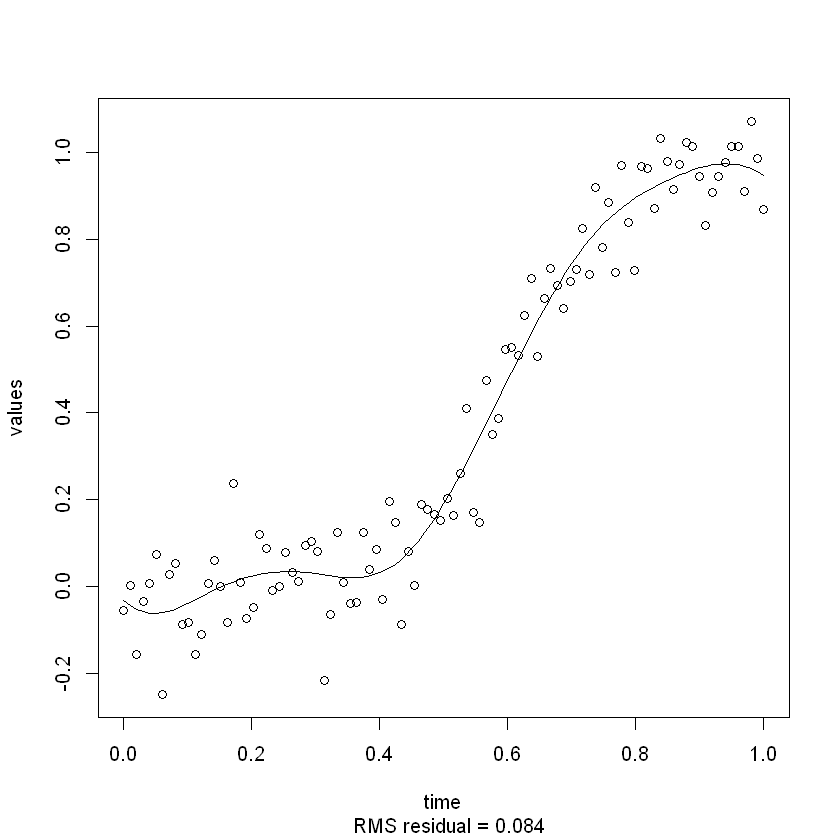

In [33]:
### Ajuste de curvas 
q_max_ajust<-ajuste(args,stat_order$q_max)

q_min_ajust<-ajuste(args,stat_order$q_min)

median_ajust<-ajuste(args,stat_order$mediana)
## Grafico funcion de mediana
plotfit.fd(stat_order$mediana, args,median_ajust$fd)

USL_ajust<-ajuste(args,USL)

LSL_ajust<-ajuste(args,LSL)

### Evaluacion de los puntos sobre los valores que se tienen de cada funcion

q_max_eval<-eval.fd(args,q_max_ajust$fd)

q_min_eval<-eval.fd(args,q_min_ajust$fd)

median_eval<-eval.fd(args,median_ajust$fd)


USL_eval<-eval.fd(args,USL_ajust$fd)

LSL_eval<-eval.fd(args,LSL_ajust$fd)

### calculo de las estadisticas

C_B_P<-trapesio(USL_eval-LSL_eval,args)/trapesio(q_max_eval-q_min_eval,args);print(paste("C_B_P =",C_B_P))

C_B_PK<-min(
  trapesio(USL_eval-median_eval,args)/trapesio(q_max_eval-median_eval,args),
  trapesio(median_eval-LSL_eval,args)/trapesio(median_eval-q_min_eval,args)
);print(paste("C_B_PK =",C_B_PK))
